In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x = np.expand_dims(train_x, axis=-1)
train_y = np.array(tf.keras.utils.to_categorical(train_y, 10))
test_x = np.expand_dims(test_x, axis=-1)
test_y = np.array(tf.keras.utils.to_categorical(test_y, 10))
train_x = train_x/255.0
test_x = test_x/255.0

In [5]:
def create_dataset(x, y):
  dataset = tf.data.Dataset.from_tensor_slices((x, y))
  dataset = dataset.batch(64).prefetch(1)
  return dataset

In [6]:
train_dataset = create_dataset(train_x, train_y)
val_dataset = create_dataset(test_x, test_y)

In [7]:
def my_model():
  input = Input(name='input', shape=(28,28,1))
  x = Conv2D(32, (3,3), activation='relu', name='first_conv')(input)
  x = MaxPool2D((2,2), name='first_maxpool')(x)
  x = Conv2D(64, (3,3), activation='relu', name='second_conv')(x)
  x = MaxPool2D((2,2), name='second_maxpool')(x)
  x = Flatten(name='flatten')(x)
  x = Dense(128, activation='relu', name='dense')(x)
  x = Dense(10, activation='softmax', name='output')(x)
  model = Model(inputs=input, outputs=x)
  return model

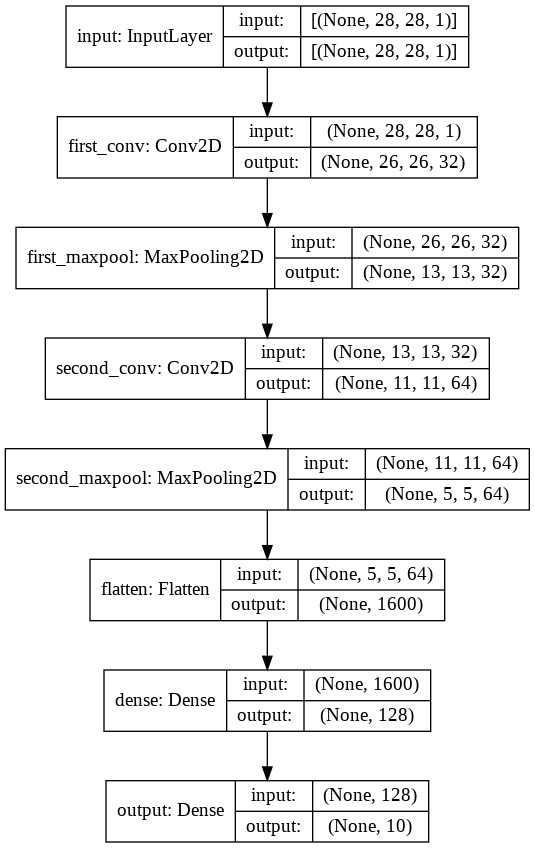

In [9]:
model = my_model()
plot_model(model, show_shapes=True)

In [10]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss=loss, optimizer=optimizer)

In [11]:
def train_model(model, x, y, loss):
  with tf.GradientTape() as tape:
    current_loss = loss(y, model(x))
  gradients = tape.gradient(current_loss, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  return np.mean(current_loss.numpy())
def train_one_epoch(model, dataset, loss):
  losses = []
  accuracy = []
  for step, single_batch in enumerate(dataset):
    loss_value = train_model(model, single_batch[0], single_batch[1], loss)
    losses.append(loss_value)
  for step, single_batch in enumerate(dataset):
    y_true = tf.argmax(single_batch[1], axis=1).numpy()
    y_pred = tf.argmax(model(single_batch[0]), axis=1).numpy()
    accuracy.append(accuracy_score(y_true, y_pred))
  return losses, accuracy
def validation_loss_acc(model, dataset, loss):
  val_loasses = []
  val_accuracy = []
  for step, single_batch in enumerate(dataset):
    val_loasses.append(np.mean(loss(single_batch[1], model(single_batch[0]))))
    y_true = tf.argmax(single_batch[1], axis=1).numpy()
    y_pred = tf.argmax(model(single_batch[0]), axis=1).numpy()
    val_accuracy.append(accuracy_score(y_true, y_pred))
  return val_loasses, val_accuracy

In [12]:
epochs=5
epoch_train_losses = []
epoch_val_losses = []
epoch_train_accuracy = []
epoch_val_accuracy = []
model_history = {}
for epoch in range(epochs):
  #train_one_epoch(model, train_dataset, loss)
  loss_value, train_accuracy = train_one_epoch(model, train_dataset, loss)
  val_loss, val_accuracy = validation_loss_acc(model, val_dataset, loss)
  print("Epoch {}/{}: Train Loss:{:.4f} Validation loss:{:.4f} Train Accuracy:{:.4f} Validation Accuracy:{:.4f}".
        format(epoch+1, epochs, np.mean(loss_value), np.mean(val_loss), np.mean(train_accuracy), np.mean(val_accuracy)))
  epoch_train_losses.append(np.mean(loss_value))
  epoch_val_losses.append(np.mean(val_loss))
  epoch_train_accuracy.append(np.mean(train_accuracy))
  epoch_val_accuracy.append(np.mean(val_accuracy))
model_history['train_loss'] = epoch_train_losses
model_history['val_loss'] = epoch_val_losses
model_history['train_accuracy'] = epoch_train_accuracy
model_history['val_accuracy'] = epoch_val_accuracy


Epoch 1/5: Train Loss:0.4859 Validation loss:0.3662 Train Accuracy:0.8785 Validation Accuracy:0.8694
Epoch 2/5: Train Loss:0.3129 Validation loss:0.3073 Train Accuracy:0.9026 Validation Accuracy:0.8902
Epoch 3/5: Train Loss:0.2632 Validation loss:0.2785 Train Accuracy:0.9164 Validation Accuracy:0.9005
Epoch 4/5: Train Loss:0.2316 Validation loss:0.2650 Train Accuracy:0.9258 Validation Accuracy:0.9061
Epoch 5/5: Train Loss:0.2071 Validation loss:0.2612 Train Accuracy:0.9325 Validation Accuracy:0.9077


Text(0, 0.5, 'Accuracy')

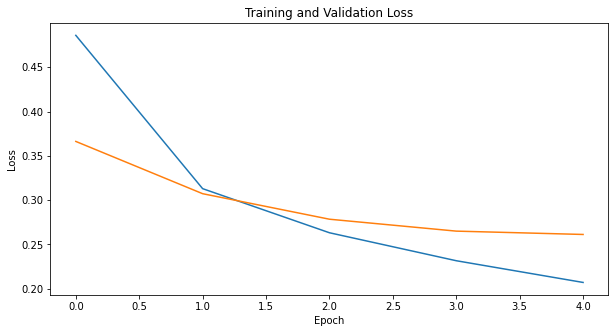

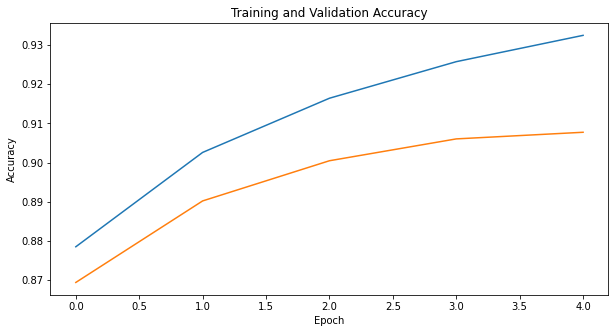

In [18]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(model_history['train_loss'])
plt.plot(model_history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy")
plt.plot(model_history['train_accuracy'])
plt.plot(model_history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")